In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pylab as plt
import numpy as np
from tensorflow.keras import layers
import tensorflow_datasets as dfds

In [2]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [3]:
CLASSIFIER_URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
img_size = 224

In [4]:
m = tf.keras.Sequential([
    hub.KerasLayer(CLASSIFIER_URL, input_shape=(img_size, img_size, 3))
])

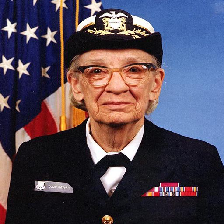

In [5]:
import PIL.Image as Image
test_image = tf.keras.utils.get_file('testImage.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
test_image = Image.open(test_image).resize((img_size, img_size))
test_image

In [6]:
test_image = np.array(test_image)/255.0
test_image.shape

(224, 224, 3)

In [7]:
result = m.predict(test_image[np.newaxis, ...])
result.shape

(1, 1001)

In [8]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

653

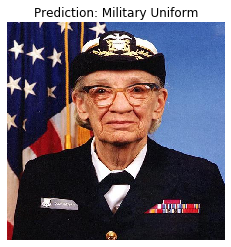

In [9]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

plt.imshow(test_image)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())